In [70]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [71]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape:taking transpose
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

# print(X_train_orig.shape)
# print(Y_train_orig.shape)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


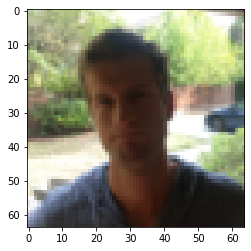

In [84]:
plt.imshow(X_train[10])

In [85]:
Y_train[10]

array([0], dtype=int64)

In [74]:
classes # 0:sad, 1:happy

array([0, 1], dtype=int64)

In [138]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    print("padded ",X.shape)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = 1, name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    return model

In [139]:
happy_model=HappyModel(X_train.shape[1:])

padded  (?, 70, 70, 3)


In [140]:
happy_model.compile(optimizer = "adam", loss ='binary_crossentropy', metrics = ["accuracy"])

In [141]:
happy_model.fit(x = X_train , y = Y_train, epochs = 40, batch_size = 32)

Epoch 1/40
600/600 [==============================] - 4s 7ms/step - loss: 1.6364 - accuracy: 0.6150
Epoch 2/40
600/600 [==============================] - 3s 6ms/step - loss: 0.2933 - accuracy: 0.8817
Epoch 3/40
600/600 [==============================] - 4s 6ms/step - loss: 0.1489 - accuracy: 0.9450
Epoch 4/40
600/600 [==============================] - 4s 6ms/step - loss: 0.1289 - accuracy: 0.9483
Epoch 5/40
600/600 [==============================] - 3s 6ms/step - loss: 0.1420 - accuracy: 0.9383
Epoch 6/40
600/600 [==============================] - 3s 6ms/step - loss: 0.0980 - accuracy: 0.9667
Epoch 7/40
600/600 [==============================] - 3s 6ms/step - loss: 0.0730 - accuracy: 0.9783
Epoch 8/40
600/600 [==============================] - 4s 6ms/step - loss: 0.0983 - accuracy: 0.9583
Epoch 9/40
600/600 [==============================] - 3s 6ms/step - loss: 0.1299 - accuracy: 0.9450
Epoch 10/40
600/600 [==============================] - 3s 6ms/step - loss: 0.0608 - accuracy: 0.9800

In [142]:
pred=happy_model.evaluate(x = X_train, y = Y_train)
print("loss= ",pred[0])
print("Train Accuracy ",pred[1])

600/600 [==============================] - 2s 4ms/step
loss=  0.26743546247482297
Train Accuracy  0.8683333396911621


In [143]:
preds = happy_model.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 4ms/step
Loss = 0.41755484104156493
Test Accuracy = 0.8399999737739563


In [144]:
happy_model.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_17 (ZeroPaddi (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_18 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 32768)             0

array([[0.]], dtype=float32)

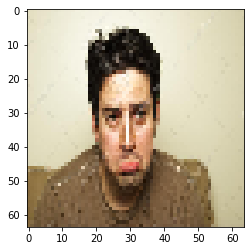

In [147]:
#checking of a Random Image
img_path = 'images/sad3.jpg'
img = image.load_img(img_path, target_size=(64,64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
happy_model.predict(x)